## Data Processing & Dimensionality Reduction

The purpose of this notebook is to move forward with cleaning and wrangling our dataset. This could be anything from removing null values, removing unnecessary columns, removing outliers and potentially fixing incorrectly formatted data. All this with the purpose of preparing our data for the next step of creating our model. We will also need to perform some dimensionality reduction for a better machine learning model in the future. By the end of this notebook we will have a clean dataset ready to be inputted into an unsupervised machine learning model. 

### Imports

In [1]:
#all imports needed for this notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [2]:
#data reading
df = pd.read_csv("../data/raw/train.csv")
df.head()

Unnamed: 0           artist_name            track_name  release_date genre  \
0           0                mukesh  mohabbat bhi jhoothi          1950   pop   
1           4         frankie laine             i believe          1950   pop   
2           6           johnnie ray                   cry          1950   pop   
3          10           pérez prado              patricia          1950   pop   
4          12  giorgos papadopoulos    apopse eida oneiro          1950   pop   

                                              lyrics  len    dating  violence  \
0  hold time feel break feel untrue convince spea...   95  0.000598  0.063746   
1  believe drop rain fall grow believe darkest ni...   51  0.035537  0.096777   
2  sweetheart send letter goodbye secret feel bet...   24  0.002770  0.002770   
3  kiss lips want stroll charm mambo chacha merin...   54  0.048249  0.001548   
4  till darling till matter know till dream live ...   48  0.001350  0.001350   

   world/life  ...  communication   obscene     music  movement/places  \
0    0.000598  ...       0.263751  0.000598  0.039288         0.000598   
1    0.443435  ...       0.001284  0.001284  0.118034         0.001284   
2    0.002770  ...       0.250668  0.002770  0.323794         0.002770   
3    0.001548  ...       0.001548  0.001548  0.001548         0.129250   
4    0.417772  ...       0.001350  0.001350  0.001350         0.001350   

   light/visual perceptions  family/spiritual   sadness  feelings       topic  \
0                  0.000598          0.000598  0.380299  0.117175     sadness   
1                  0.212681          0.051124  0.001284  0.001284  world/life   
2                  0.002770          0.002770  0.002770  0.225422       music   
3                  0.001548          0.001548  0.225889  0.001548    romantic   
4                  0.001350          0.029755  0.068800  0.001350    romantic   

   age  
0  1.0  
1  1.0  
2  1.0  
3  1.0  
4  1.0  

[5 rows x 24 columns]

In [3]:
#include our recommendation data to our training set for data processing
df = pd.concat([
    df, pd.read_csv('../data/raw/recommend.csv').drop(['like/girls'], axis=1)
], ignore_index=True)

### Data Cleaning

Before we begin with our data preparation it could be useful to get a better understanding of our dataset using some initial screenings.

In [4]:
#identify any missing values in our dataset
df.isna().sum()

Unnamed: 0                  0
artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
sadness                     0
feelings                    0
topic                       0
age                         0
dtype: int64

In [5]:
#visualize the distribution of our data
df.describe()

Unnamed: 0  release_date           len        dating      violence  \
count  28372.000000  28372.000000  28372.000000  28372.000000  28372.000000   
mean   42946.323558   1990.236888     73.028444      0.021112      0.118396   
std    24749.325492     18.487463     41.829831      0.052370      0.178684   
min        0.000000   1950.000000      1.000000      0.000291      0.000284   
25%    20391.250000   1975.000000     42.000000      0.000923      0.001120   
50%    45405.500000   1991.000000     63.000000      0.001462      0.002506   
75%    64090.500000   2007.000000     93.000000      0.004049      0.192608   
max    82451.000000   2019.000000    199.000000      0.647706      0.981781   

         world/life    night/time  shake the audience  family/gospel  \
count  28372.000000  28372.000000        28372.000000   28372.000000   
mean       0.120973      0.057387            0.017422       0.017045   
std        0.172200      0.111923            0.040670       0.041966   
min        0.000291      0.000289            0.000284       0.000289   
25%        0.001170      0.001032            0.000993       0.000923   
50%        0.006579      0.001949            0.001595       0.001504   
75%        0.197793      0.065842            0.010002       0.004785   
max        0.962105      0.973684            0.497463       0.545303   

           romantic  communication       obscene         music  \
count  28372.000000   28372.000000  28372.000000  28372.000000   
mean       0.048681       0.076680      0.097168      0.060047   
std        0.106095       0.109538      0.181303      0.123329   
min        0.000284       0.000291      0.000289      0.000289   
25%        0.000975       0.001144      0.001053      0.000975   
50%        0.001754       0.002632      0.001815      0.001815   
75%        0.042301       0.132136      0.088765      0.055101   
max        0.940789       0.645829      0.992298      0.956938   

       movement/places  light/visual perceptions  family/spiritual  \
count     28372.000000              28372.000000      28372.000000   
mean          0.047401                  0.049005          0.024150   
std           0.091547                  0.089554          0.051025   
min           0.000284                  0.000284          0.000284   
25%           0.000993                  0.000993          0.000957   
50%           0.001645                  0.001815          0.001645   
75%           0.054258                  0.064296          0.025498   
max           0.638021                  0.667782          0.618073   

            sadness      feelings           age  
count  28372.000000  28372.000000  28372.000000  
mean       0.129389      0.030996      0.425187  
std        0.181143      0.071652      0.264107  
min        0.000284      0.000289      0.014286  
25%        0.001144      0.000993      0.185714  
50%        0.005263      0.001754      0.414286  
75%        0.235113      0.032622      0.642857  
max        0.981424      0.958810      1.000000

In [6]:
#get the types of our dataframe columns
df.dtypes

Unnamed: 0                    int64
artist_name                  object
track_name                   object
release_date                  int64
genre                        object
lyrics                       object
len                           int64
dating                      float64
violence                    float64
world/life                  float64
night/time                  float64
shake the audience          float64
family/gospel               float64
romantic                    float64
communication               float64
obscene                     float64
music                       float64
movement/places             float64
light/visual perceptions    float64
family/spiritual            float64
sadness                     float64
feelings                    float64
topic                        object
age                         float64
dtype: object

As we can see above our data is fairly clean. There are no missing values and the there does not seem to be any values that can be attributed to errors in the data entry. All that needs to be done is preparing this clean dataset for machine learning model building. This will include transforming our data into a more useful one. 

In [7]:
#remove unnecessary string columns that wont be used in our model
string_cols = ['artist_name', 'track_name', 'lyrics']

df = df.drop(string_cols, axis=1)
df.head()

Unnamed: 0  release_date genre  len    dating  violence  world/life  \
0           0          1950   pop   95  0.000598  0.063746    0.000598   
1           4          1950   pop   51  0.035537  0.096777    0.443435   
2           6          1950   pop   24  0.002770  0.002770    0.002770   
3          10          1950   pop   54  0.048249  0.001548    0.001548   
4          12          1950   pop   48  0.001350  0.001350    0.417772   

   night/time  shake the audience  family/gospel  ...  communication  \
0    0.000598            0.000598       0.048857  ...       0.263751   
1    0.001284            0.001284       0.027007  ...       0.001284   
2    0.002770            0.002770       0.002770  ...       0.250668   
3    0.001548            0.021500       0.001548  ...       0.001548   
4    0.001350            0.001350       0.001350  ...       0.001350   

    obscene     music  movement/places  light/visual perceptions  \
0  0.000598  0.039288         0.000598                  0.000598   
1  0.001284  0.118034         0.001284                  0.212681   
2  0.002770  0.323794         0.002770                  0.002770   
3  0.001548  0.001548         0.129250                  0.001548   
4  0.001350  0.001350         0.001350                  0.001350   

   family/spiritual   sadness  feelings       topic  age  
0          0.000598  0.380299  0.117175     sadness  1.0  
1          0.051124  0.001284  0.001284  world/life  1.0  
2          0.002770  0.002770  0.225422       music  1.0  
3          0.001548  0.225889  0.001548    romantic  1.0  
4          0.029755  0.068800  0.001350    romantic  1.0  

[5 rows x 21 columns]

As we saw in our exploratory data analysis the **release_date** column and the **age** column are directly negatively correlated. This means that it would be redundant to have both of these columns in our dataset, therefore we will remove the **release_date** column. We also have an **Unnamed: 0** column that contains no information that needs to be dropped.

In [8]:
#remove other columns that wont be useful to us
df = df.drop(['Unnamed: 0', 'release_date'], axis=1)
df.head()

genre  len    dating  violence  world/life  night/time  shake the audience  \
0   pop   95  0.000598  0.063746    0.000598    0.000598            0.000598   
1   pop   51  0.035537  0.096777    0.443435    0.001284            0.001284   
2   pop   24  0.002770  0.002770    0.002770    0.002770            0.002770   
3   pop   54  0.048249  0.001548    0.001548    0.001548            0.021500   
4   pop   48  0.001350  0.001350    0.417772    0.001350            0.001350   

   family/gospel  romantic  communication   obscene     music  \
0       0.048857  0.017104       0.263751  0.000598  0.039288   
1       0.027007  0.001284       0.001284  0.001284  0.118034   
2       0.002770  0.158564       0.250668  0.002770  0.323794   
3       0.001548  0.411536       0.001548  0.001548  0.001548   
4       0.001350  0.463430       0.001350  0.001350  0.001350   

   movement/places  light/visual perceptions  family/spiritual   sadness  \
0         0.000598                  0.000598          0.000598  0.380299   
1         0.001284                  0.212681          0.051124  0.001284   
2         0.002770                  0.002770          0.002770  0.002770   
3         0.129250                  0.001548          0.001548  0.225889   
4         0.001350                  0.001350          0.029755  0.068800   

   feelings       topic  age  
0  0.117175     sadness  1.0  
1  0.001284  world/life  1.0  
2  0.225422       music  1.0  
3  0.001548    romantic  1.0  
4  0.001350    romantic  1.0

In [9]:
#get dummies for our genre column
genre_dummies = pd.get_dummies(df['genre'], dtype='int')

In [10]:
#get dummies for our topic column
topic_dummies = pd.get_dummies(df['topic'], dtype='int')

It is very important to note that in order to perform Principal component analysis in the future we must normalize our dataset. Since we have our data separated now would be a good time to normalize our data. 

In [11]:
#gather columns we want to normalize
normalize_df = df.drop(['genre', 'topic'], axis=1)

In [12]:
#normalize our dataset
mms = MinMaxScaler()
normalize_data = mms.fit_transform(normalize_df)

In [13]:
#convert our normalized data into a dataframe
standard_df = pd.DataFrame(normalize_data, columns=normalize_df.columns)

In [14]:
#remerge all our data into one final dataset
data = pd.concat([standard_df, genre_dummies, topic_dummies], axis=1)
data.head()

len    dating  violence  world/life  night/time  shake the audience  \
0  0.474747  0.000475  0.064658    0.000320    0.000317            0.000631   
1  0.252525  0.054442  0.098311    0.460738    0.001022            0.002010   
2  0.116162  0.003830  0.002532    0.002578    0.002549            0.004999   
3  0.267677  0.074077  0.001287    0.001307    0.001293            0.042672   
4  0.237374  0.001635  0.001085    0.434056    0.001089            0.002142   

   family/gospel  romantic  communication   obscene  ...  reggae  rock  \
0       0.089113  0.017884       0.408124  0.000311  ...       0     0   
1       0.049023  0.001062       0.001538  0.001003  ...       0     0   
2       0.004552  0.168293       0.387858  0.002501  ...       0     0   
3       0.002310  0.437267       0.001948  0.001269  ...       0     0   
4       0.001946  0.492444       0.001640  0.001069  ...       0     0   

   feelings  music  night/time  obscene  romantic  sadness  violence  \
0         0      0           0        0         0        1         0   
1         0      0           0        0         0        0         0   
2         0      1           0        0         0        0         0   
3         0      0           0        0         1        0         0   
4         0      0           0        0         1        0         0   

   world/life  
0           0  
1           1  
2           0  
3           0  
4           0  

[5 rows x 32 columns]

### Dimensionality Reduction

Now that we have a clean dataset we can perform our dimensionality reduction for a better machine learning model. We will do this by performing principal component analysis. 

In [15]:
#build our pca
pca = PCA()
#fit our pca on our dataset
pca.fit(data)

PCA()

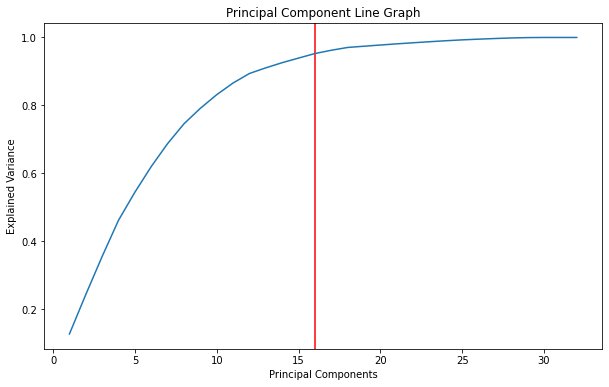

In [16]:
#plot variance explained by number of components
plt.figure(figsize=(10, 6))
plt.title('Principal Component Line Graph')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.axvline(16, color='red')
plt.plot(range(1, 33), np.cumsum(pca.explained_variance_ratio_))

From the above graph we can see that the elbow of our graph occurs at 16 principal components. With 16 principal components we can preserve around 94.7% of the variance of our original dataset. Although our elbow occurs at 16 for this project we are going to go ahead with using 17 principal components since with these components we make the cutoff of accounting for at least 95% of the original dataset, with 95.8% variance still accounted for. We can achieve this all while compressing our original dataset to 53% of its original size. 

In [17]:
#transform our dataset using our optimal number of components
pca = PCA(n_components=17)

pca_data = pca.fit_transform(data)

In [18]:
#convert our pca_data into a dataframe
pca_df = pd.DataFrame(pca_data, columns=['pca_' + str(i) for i in range(1, 18)])
pca_df.head()

pca_1     pca_2     pca_3     pca_4     pca_5     pca_6     pca_7  \
0  0.830215  0.466986 -0.683765  0.457127 -0.048251 -0.022484  0.024267   
1  0.155867  0.483997  0.559965  1.050504  0.018414 -0.094124 -0.023480   
2  0.160868  0.465783 -0.181370  0.570267  0.124924 -0.460531  0.369899   
3  0.186559  0.501486 -0.243100  0.580622  0.093659 -0.325189  0.242636   
4  0.163182  0.496778 -0.101920  0.664929  0.078647 -0.305094  0.230673   

      pca_8     pca_9    pca_10    pca_11    pca_12    pca_13    pca_14  \
0 -0.024945 -0.047609 -0.038990  0.232742 -0.402358 -0.016166  0.178969   
1  0.027228 -0.155727 -0.096078  0.214693 -0.416140  0.054423 -0.190287   
2  0.879250  0.308158 -0.471682  0.130232 -0.271683  0.261533  0.244171   
3  0.481116 -0.166719  0.356101  0.948744  0.236005 -0.070773 -0.224190   
4  0.457127 -0.183040  0.351317  0.970367  0.244868 -0.008143 -0.209713   

     pca_15    pca_16    pca_17  
0  0.169989 -0.287988 -0.012622  
1  0.032858  0.015878 -0.167086  
2  0.033664 -0.088328  0.044048  
3  0.024853 -0.060442  0.182475  
4 -0.016018 -0.052503  0.008316

In [19]:
#here we separate our training and recommendation datasets
train_pca = pca_df.drop(pca_df.tail(10).index)
recommend_pca = pca_df.iloc[-10:]

In [20]:
#with seperated data save as dataframes
train_pca.to_csv('../data/processed/train_pca.csv', index=False)
recommend_pca.to_csv('../data/processed/recommend_pca.csv', index=False)

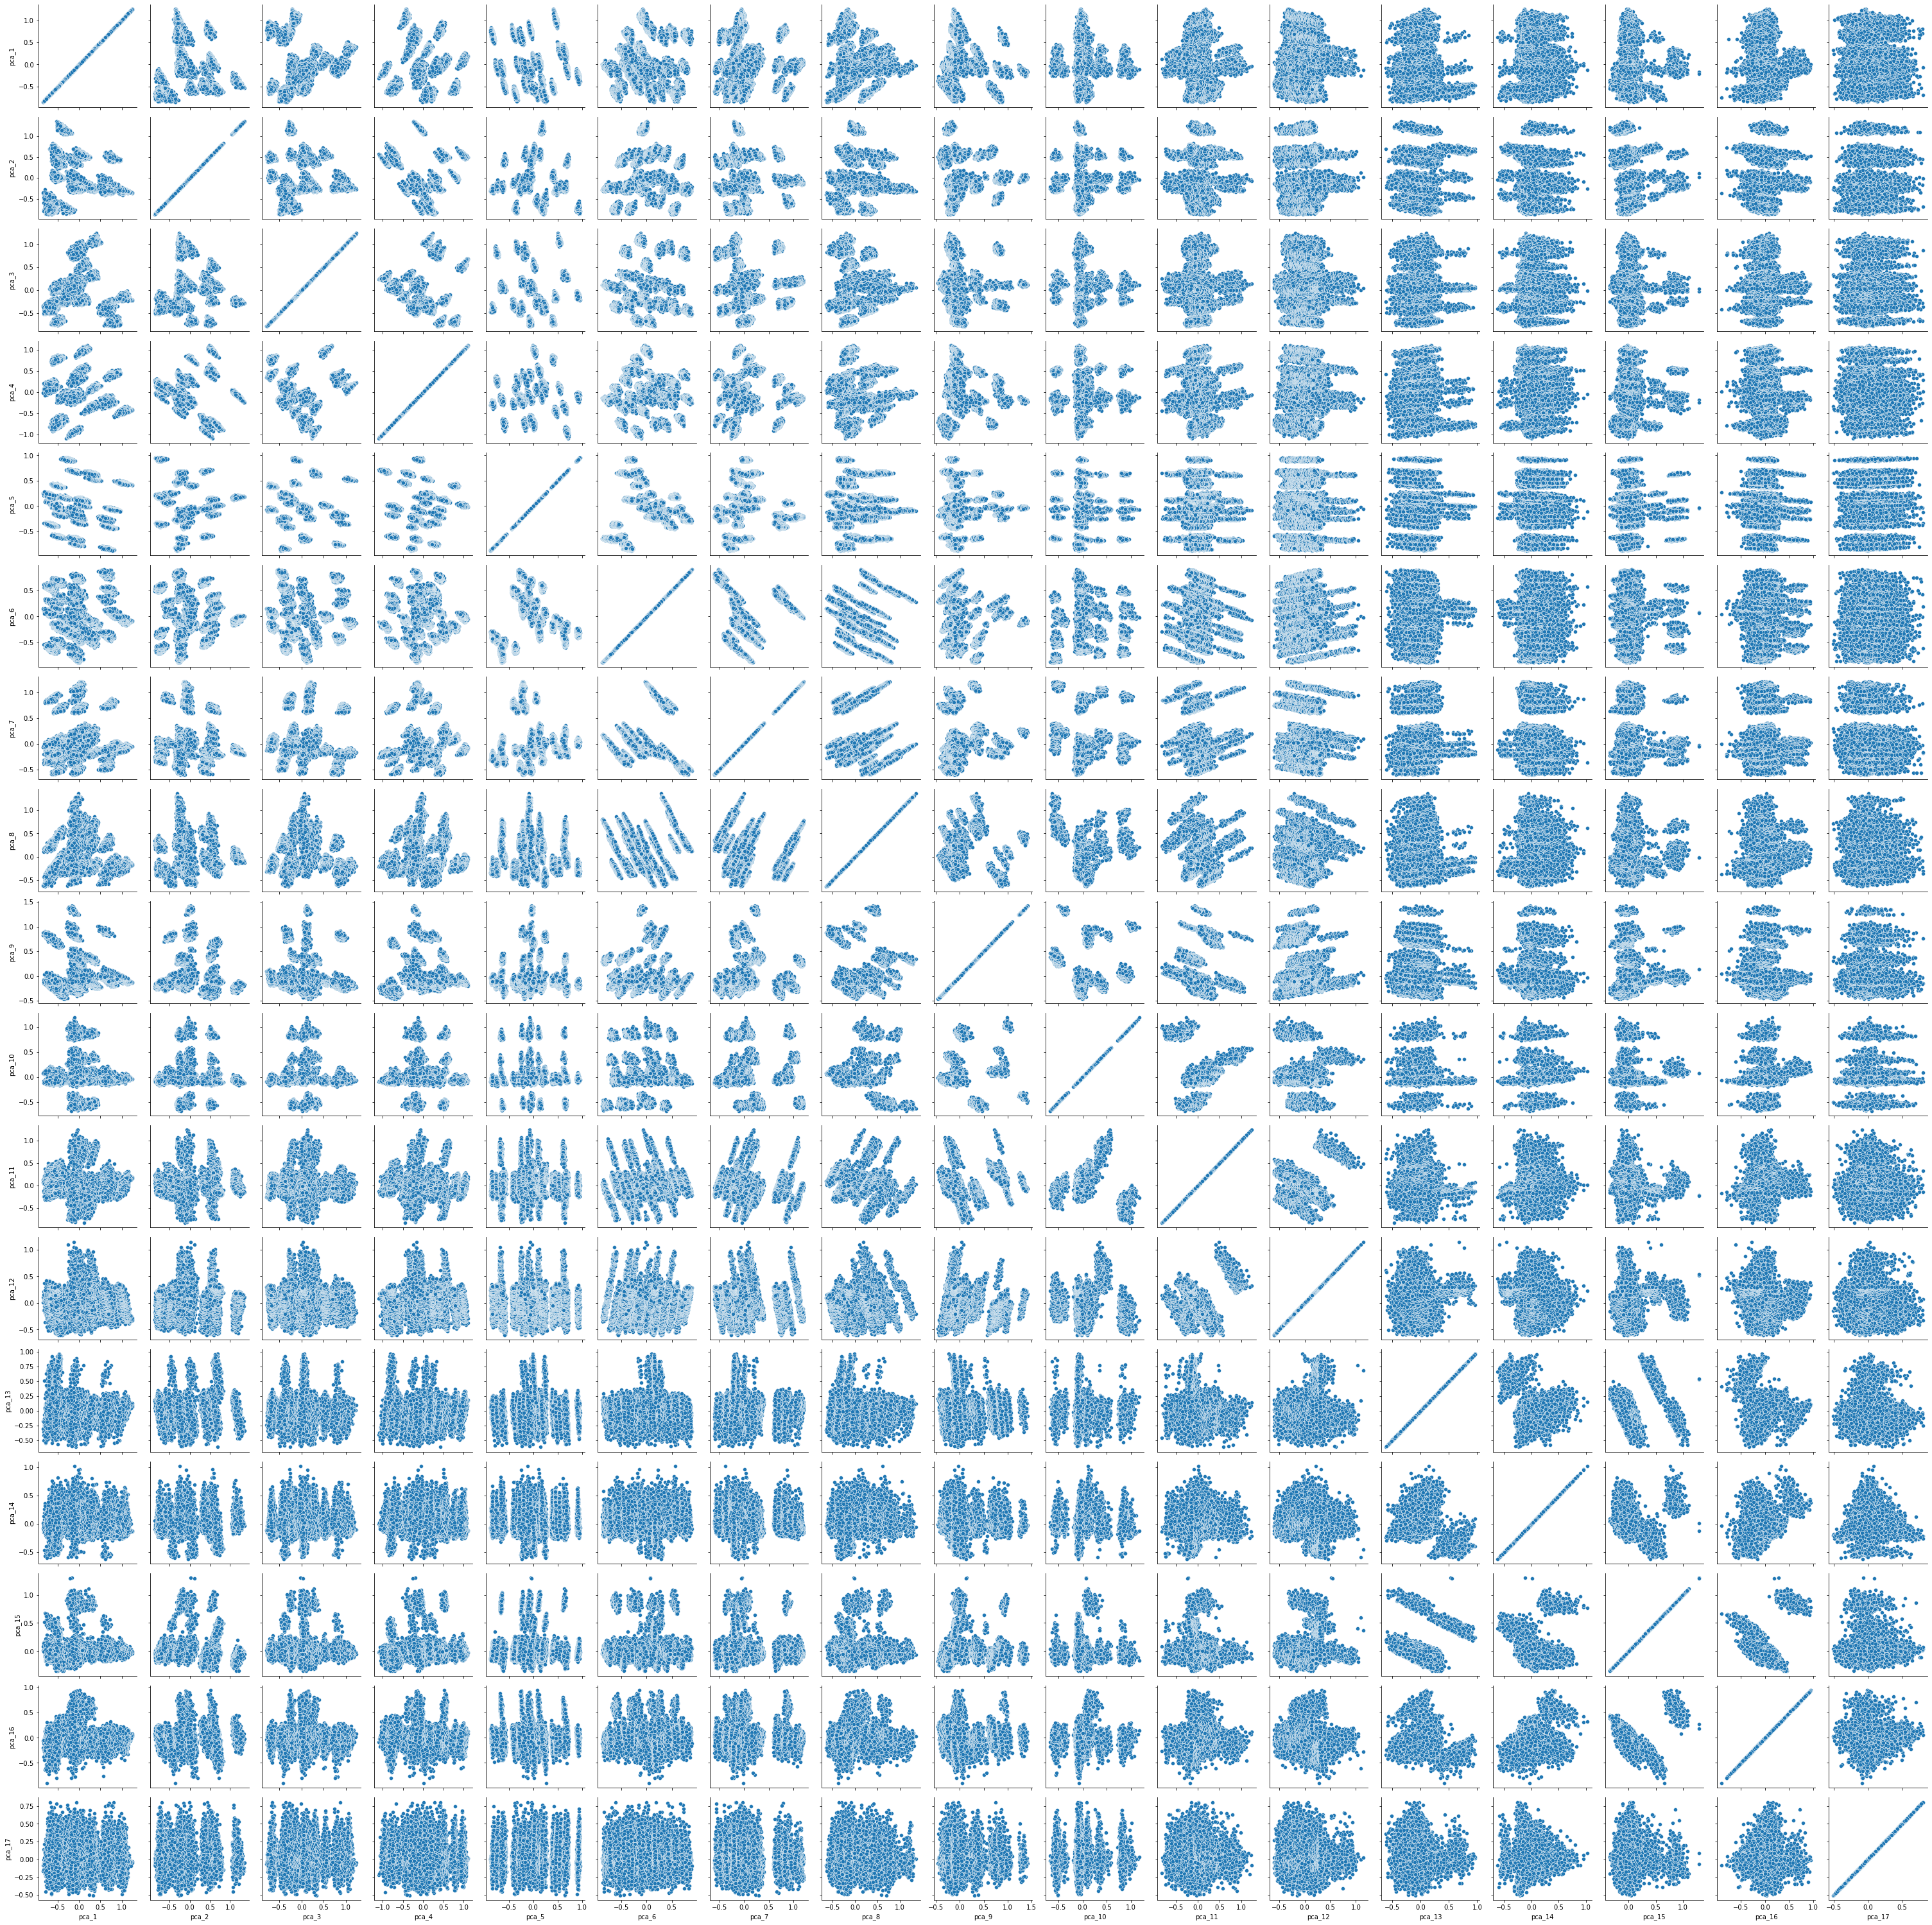

In [21]:
#plot our pca_data
g = sns.PairGrid(pca_df)
g.map(sns.scatterplot)

### Conclusion

In this notebook we have transformed our original dataset into a reduced dataset using principal component analysis. With our new dataset we have 17 componentst that account for over 95% of the variance found in the original dataset. In the next notebook we will use this dataset in order to build an unsupervised machine learning model. 